In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.5 MB/s eta 0:00:00


In [5]:
import os
#YOLO modellerini eğitmek ve kullanmak için gereken ana kütüphane
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
#Colab içinde resim dosyalarını göstermek için
from IPython.display import Image, display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
#performansın daha iyi hızlı olması için dataseti colabin geçici diskine kopyalıyorum
!cp -r "/content/drive/MyDrive/Colab Notebooks/yoda_odevlendirme_veriseti.yolov8/dataset" "/content/my_dataset"

In [9]:
import yaml

#yaml dosyasindaki pathleri guncelleiyorum
yaml_path = "/content/my_dataset/data.yaml"

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

data['path'] = "/content/my_dataset"
data['train'] = "train/images"
data['val'] = "valid/images"
data['test'] = "test/images"

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print("data.yaml güncellendi")

data.yaml güncellendi


In [10]:
from ultralytics import YOLO

#Transfer Learning (Aktarımlı Öğrenme) kullanıyoruz 'yolov8s.pt'(small model), daha önce COCO veri setinde egitilmis yani model kenar-sekil bilgisini biliyor
model = YOLO("yolov8s.pt")

# name: Sonuçların kaydedileceği klasör ismi
model.train(
    data="/content/my_dataset/data.yaml",
    # epochs:datasetin kaç kez üzerinden gecilecegi
    epochs=50,
    #imgsz:goruntulerin resize edilecegi piksel degeri(YOLO icin standart 640x640)
    imgsz=640,
    #batch:GPU bellegine gore bir iterasyonda alinacak resim sayisi
    batch=16,
    #sonuclar runs/detect/shape_model klasorune kaydedilecek
    name="shape_model"
)

Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/my_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=shape_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789f8005a5d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Confusion Matrix


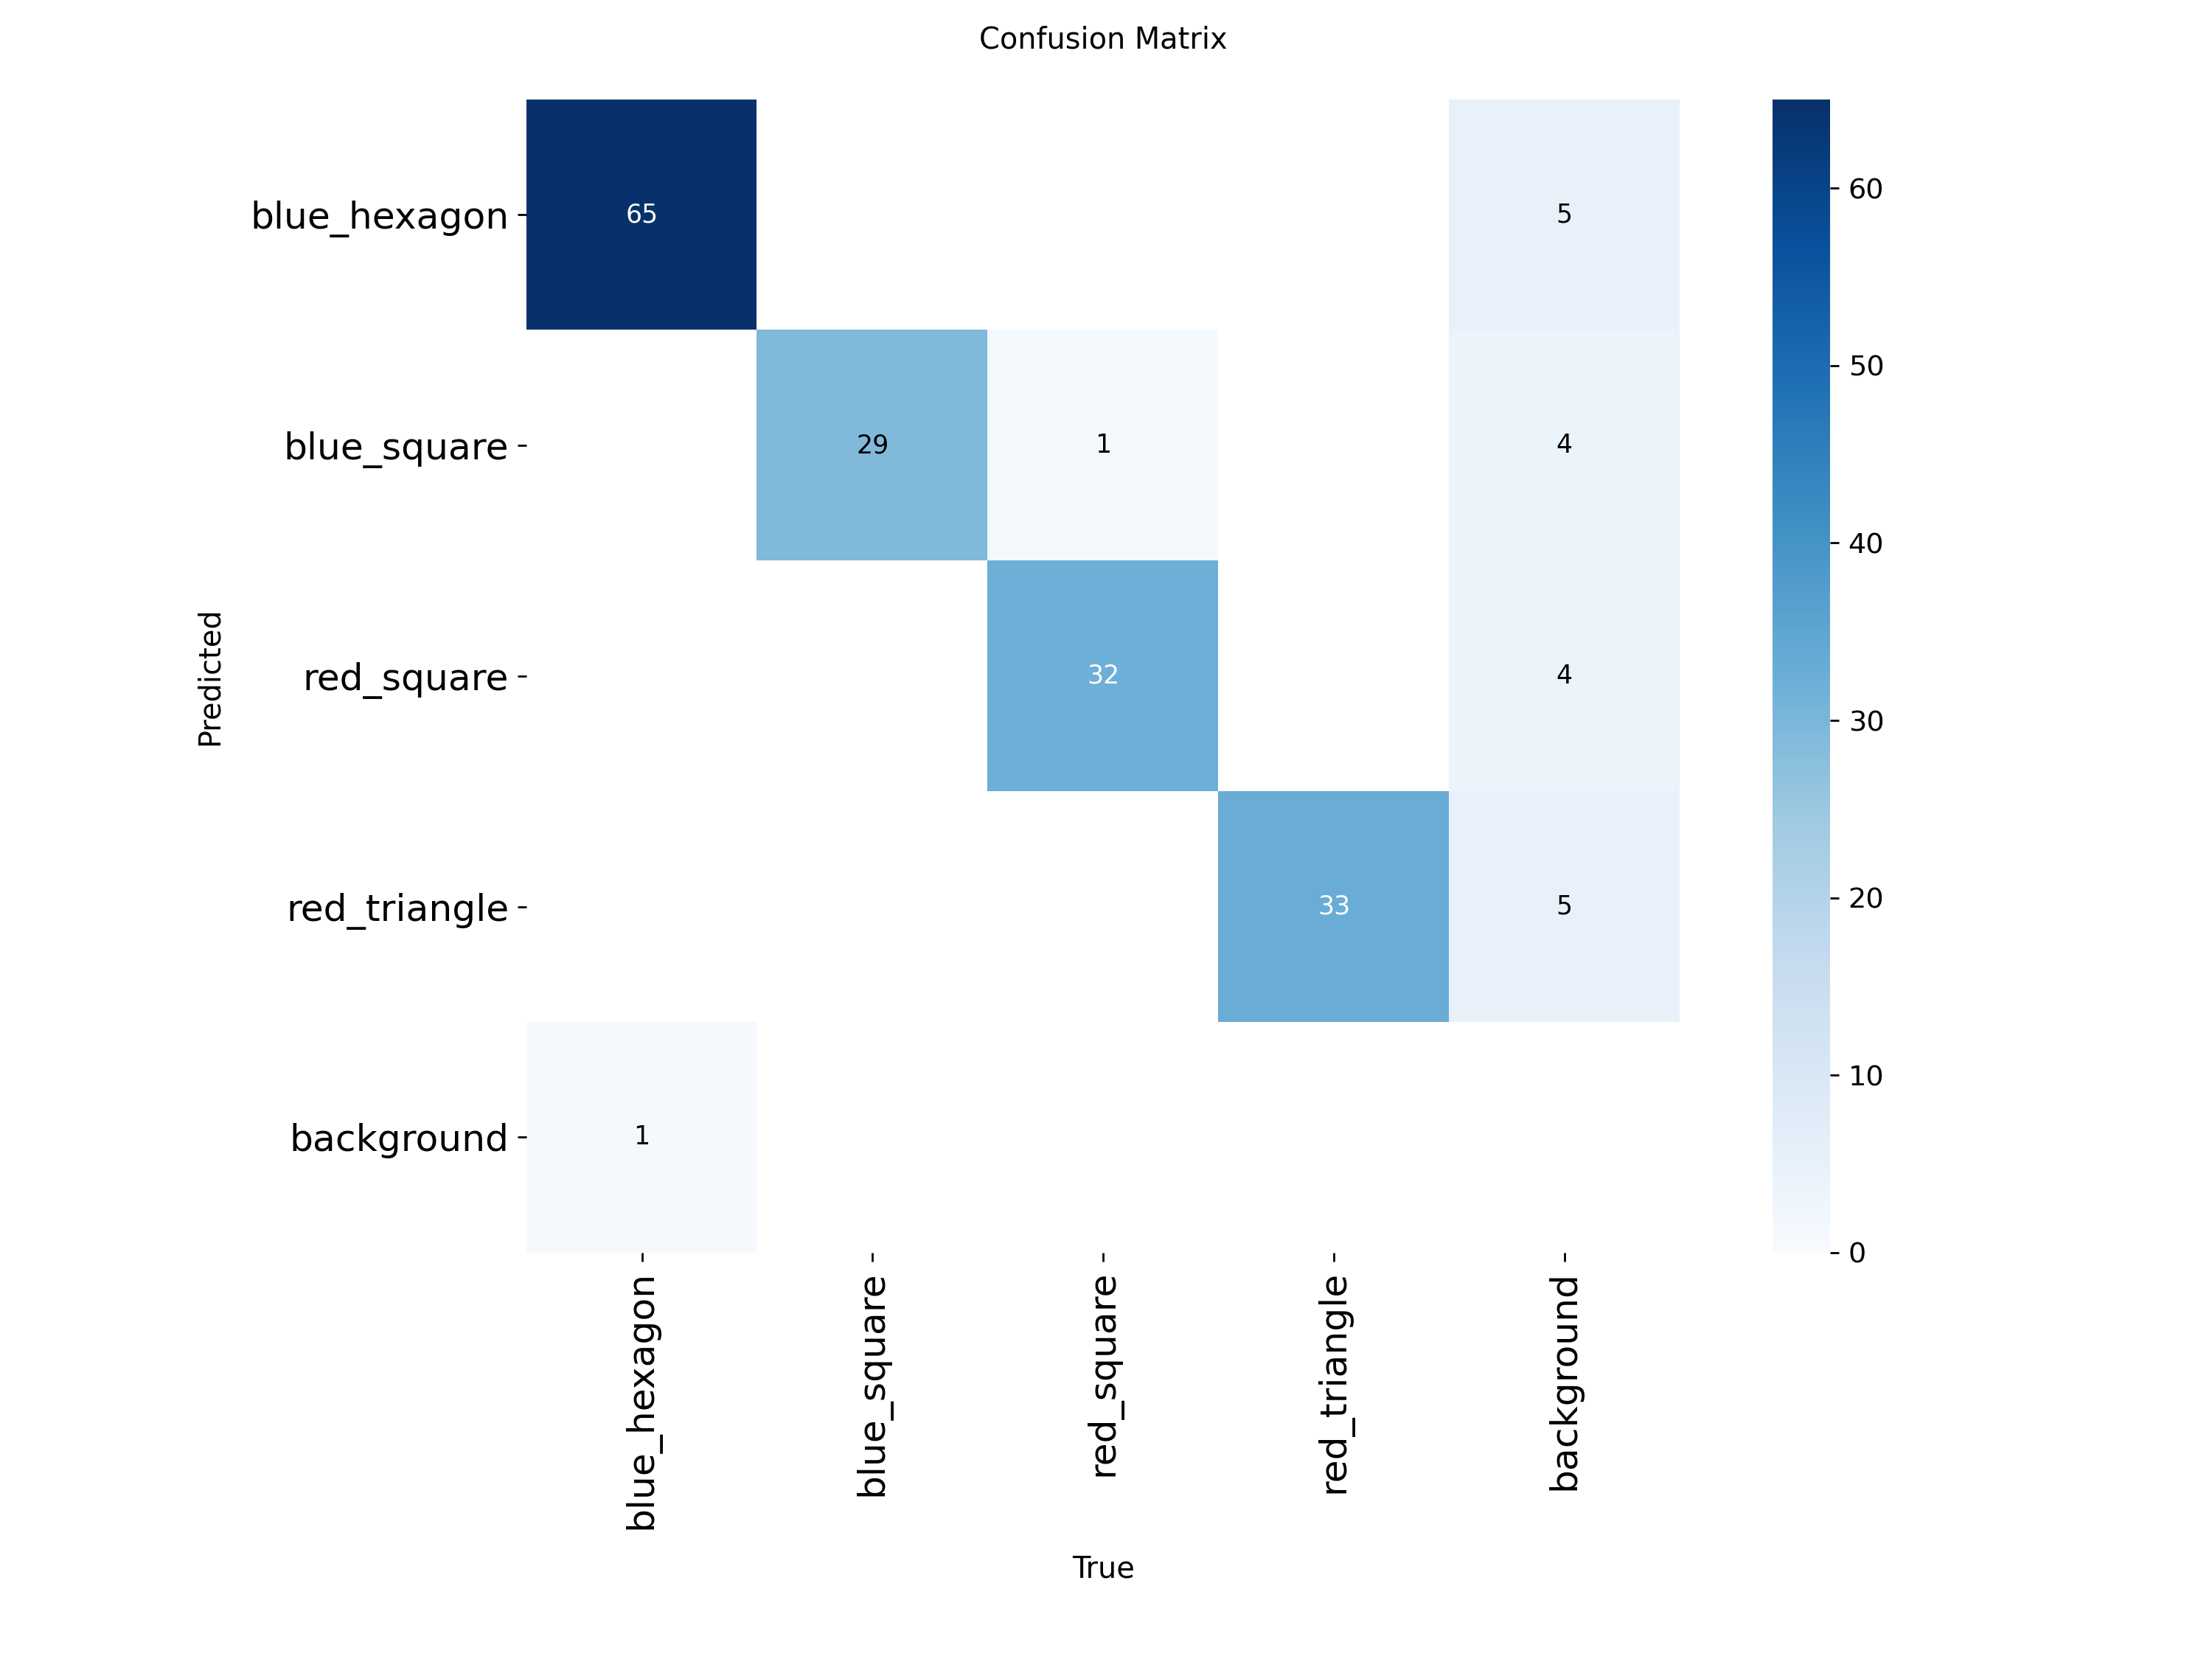

In [15]:
from IPython.display import Image, display
import os

#egitim sonuclarinin oldugu klasor
results_dir = "/content/runs/detect/shape_model"

print("Confusion Matrix")
#modelin hangi sinifları birbiriyle karıstırdığını gösterir
confusion_matrix_path = os.path.join(results_dir, "confusion_matrix.png")
if os.path.exists(confusion_matrix_path):
    display(Image(filename=confusion_matrix_path, width=600))
else:
    print("wrong path!")


model geometrik şekilleri kendi aralarında ayırt etmede yüksek başarı göstermektedir. özellikle blue_hexagon sınıfı en yüksek doğrulukla tespit edilmiştir. Ancak plain background görüntülerini tespit etmek yerine bunları hatalı bir şekilde geometrik şekil olarak etiketleme(FP) eğilimindedir.


--- Eğitim Grafikleri (Loss & mAP) ---


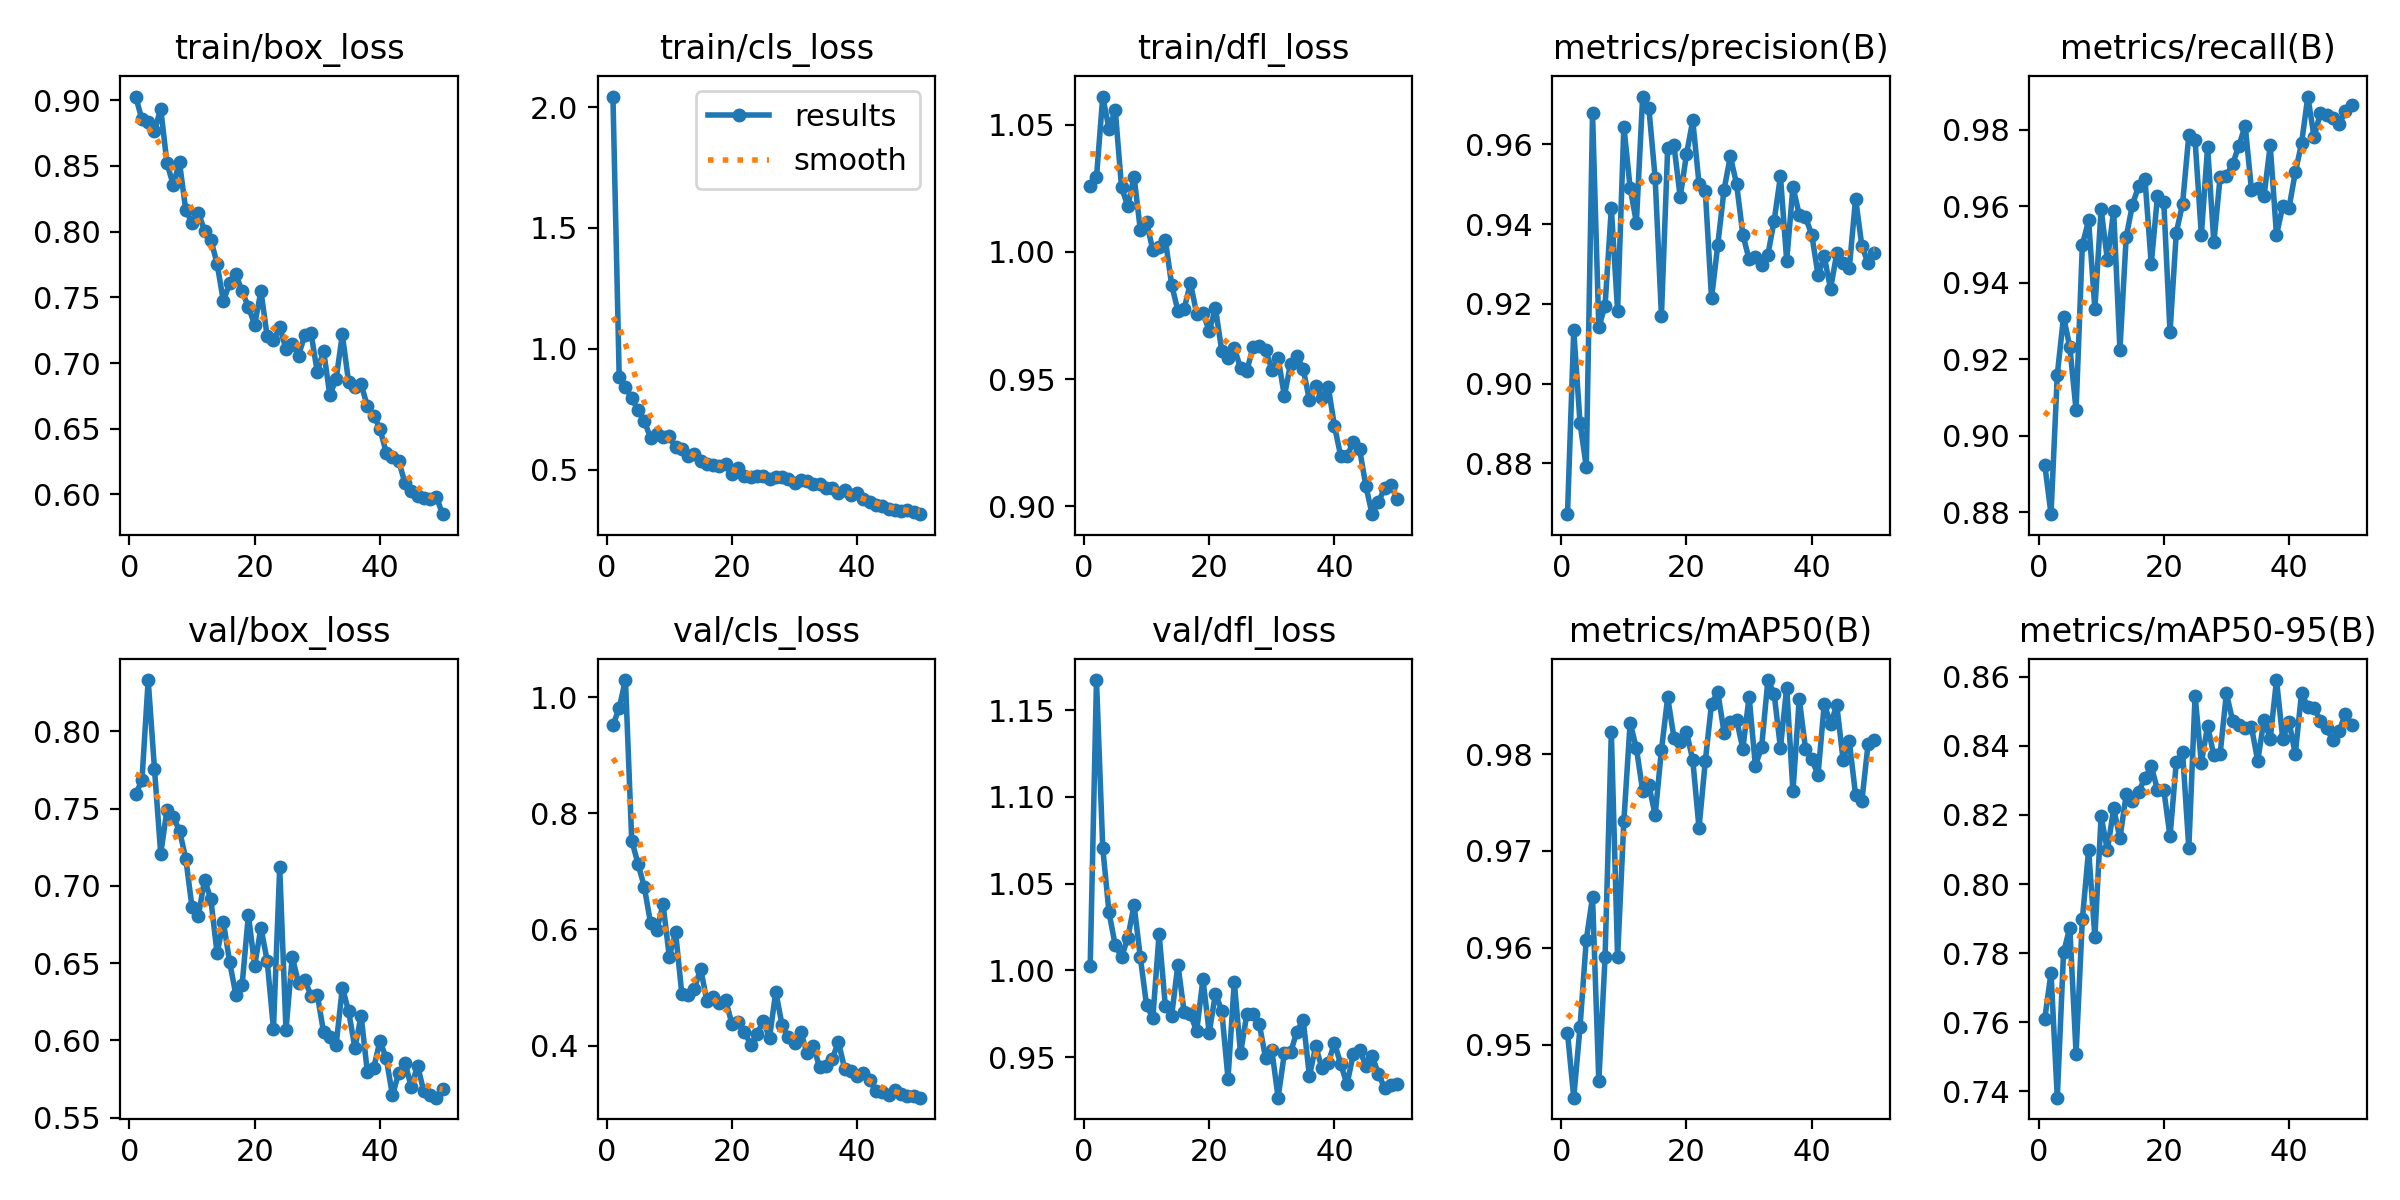

In [16]:
print("\nEğitim Grafikleri (Loss & mAP)")
results_path = os.path.join(results_dir, "results.png")
if os.path.exists(results_path):
    display(Image(filename=results_path, width=800))

loss grafiklerinin düşmesi ve mAP grafiklerinin yükselmesi eğitimin başarılı olduğunu gösterir
box_loss ve cls_loss değerlerinin istikrarlı bir şekilde azaldığı buna karşılık mAP50 değerinin 0.98, mAP50-95 değerinin ise 0.85 seviyelerine ulaştığı görülmüştür.
train ve val uyumlu olduğundan overfitting görülmüyor.

In [17]:
from ultralytics import YOLO

# 'shape_model' klasöründeki en iyi ağırlıkları(best.pt) yukluyoruz
best_model = YOLO("/content/runs/detect/shape_model/weights/best.pt")

#test seti üzerinde doğrulama
print("\n TEST Seti Performansı")
metrics = best_model.val(split='test')

print("\n")
print(f"Test Seti mAP50: {metrics.box.map50:.4f}")
print(f"Test Seti mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")



 TEST Seti Performansı
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1757.9±295.3 MB/s, size: 121.8 KB)
val: Scanning /content/my_dataset/test/labels.cache... 58 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 58/58 64.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.5it/s 2.7s
                   all         58         84      0.956      0.978      0.985      0.831
          blue_hexagon         32         33      0.959       0.97      0.968      0.834
           blue_square         20         20          1      0.942       0.99      0.824
            red_square         19         19      0.945          1      0.988      0.822
          red_triangle         12         12      0.919          1      0.995      0.845
Speed: 9.4ms preprocess, 

%95.6 Precision ve %97.8 Recall oranları modelin hatalı tahmin yapmadan neredeyse tüm nesneleri yakaladığını göstermektedir. Özellikle red_square ve red_triangle sınıflarında %100 yakalama başarısı elde edilmiştir.

--- TEST SETİ CONFUSION MATRIX ---


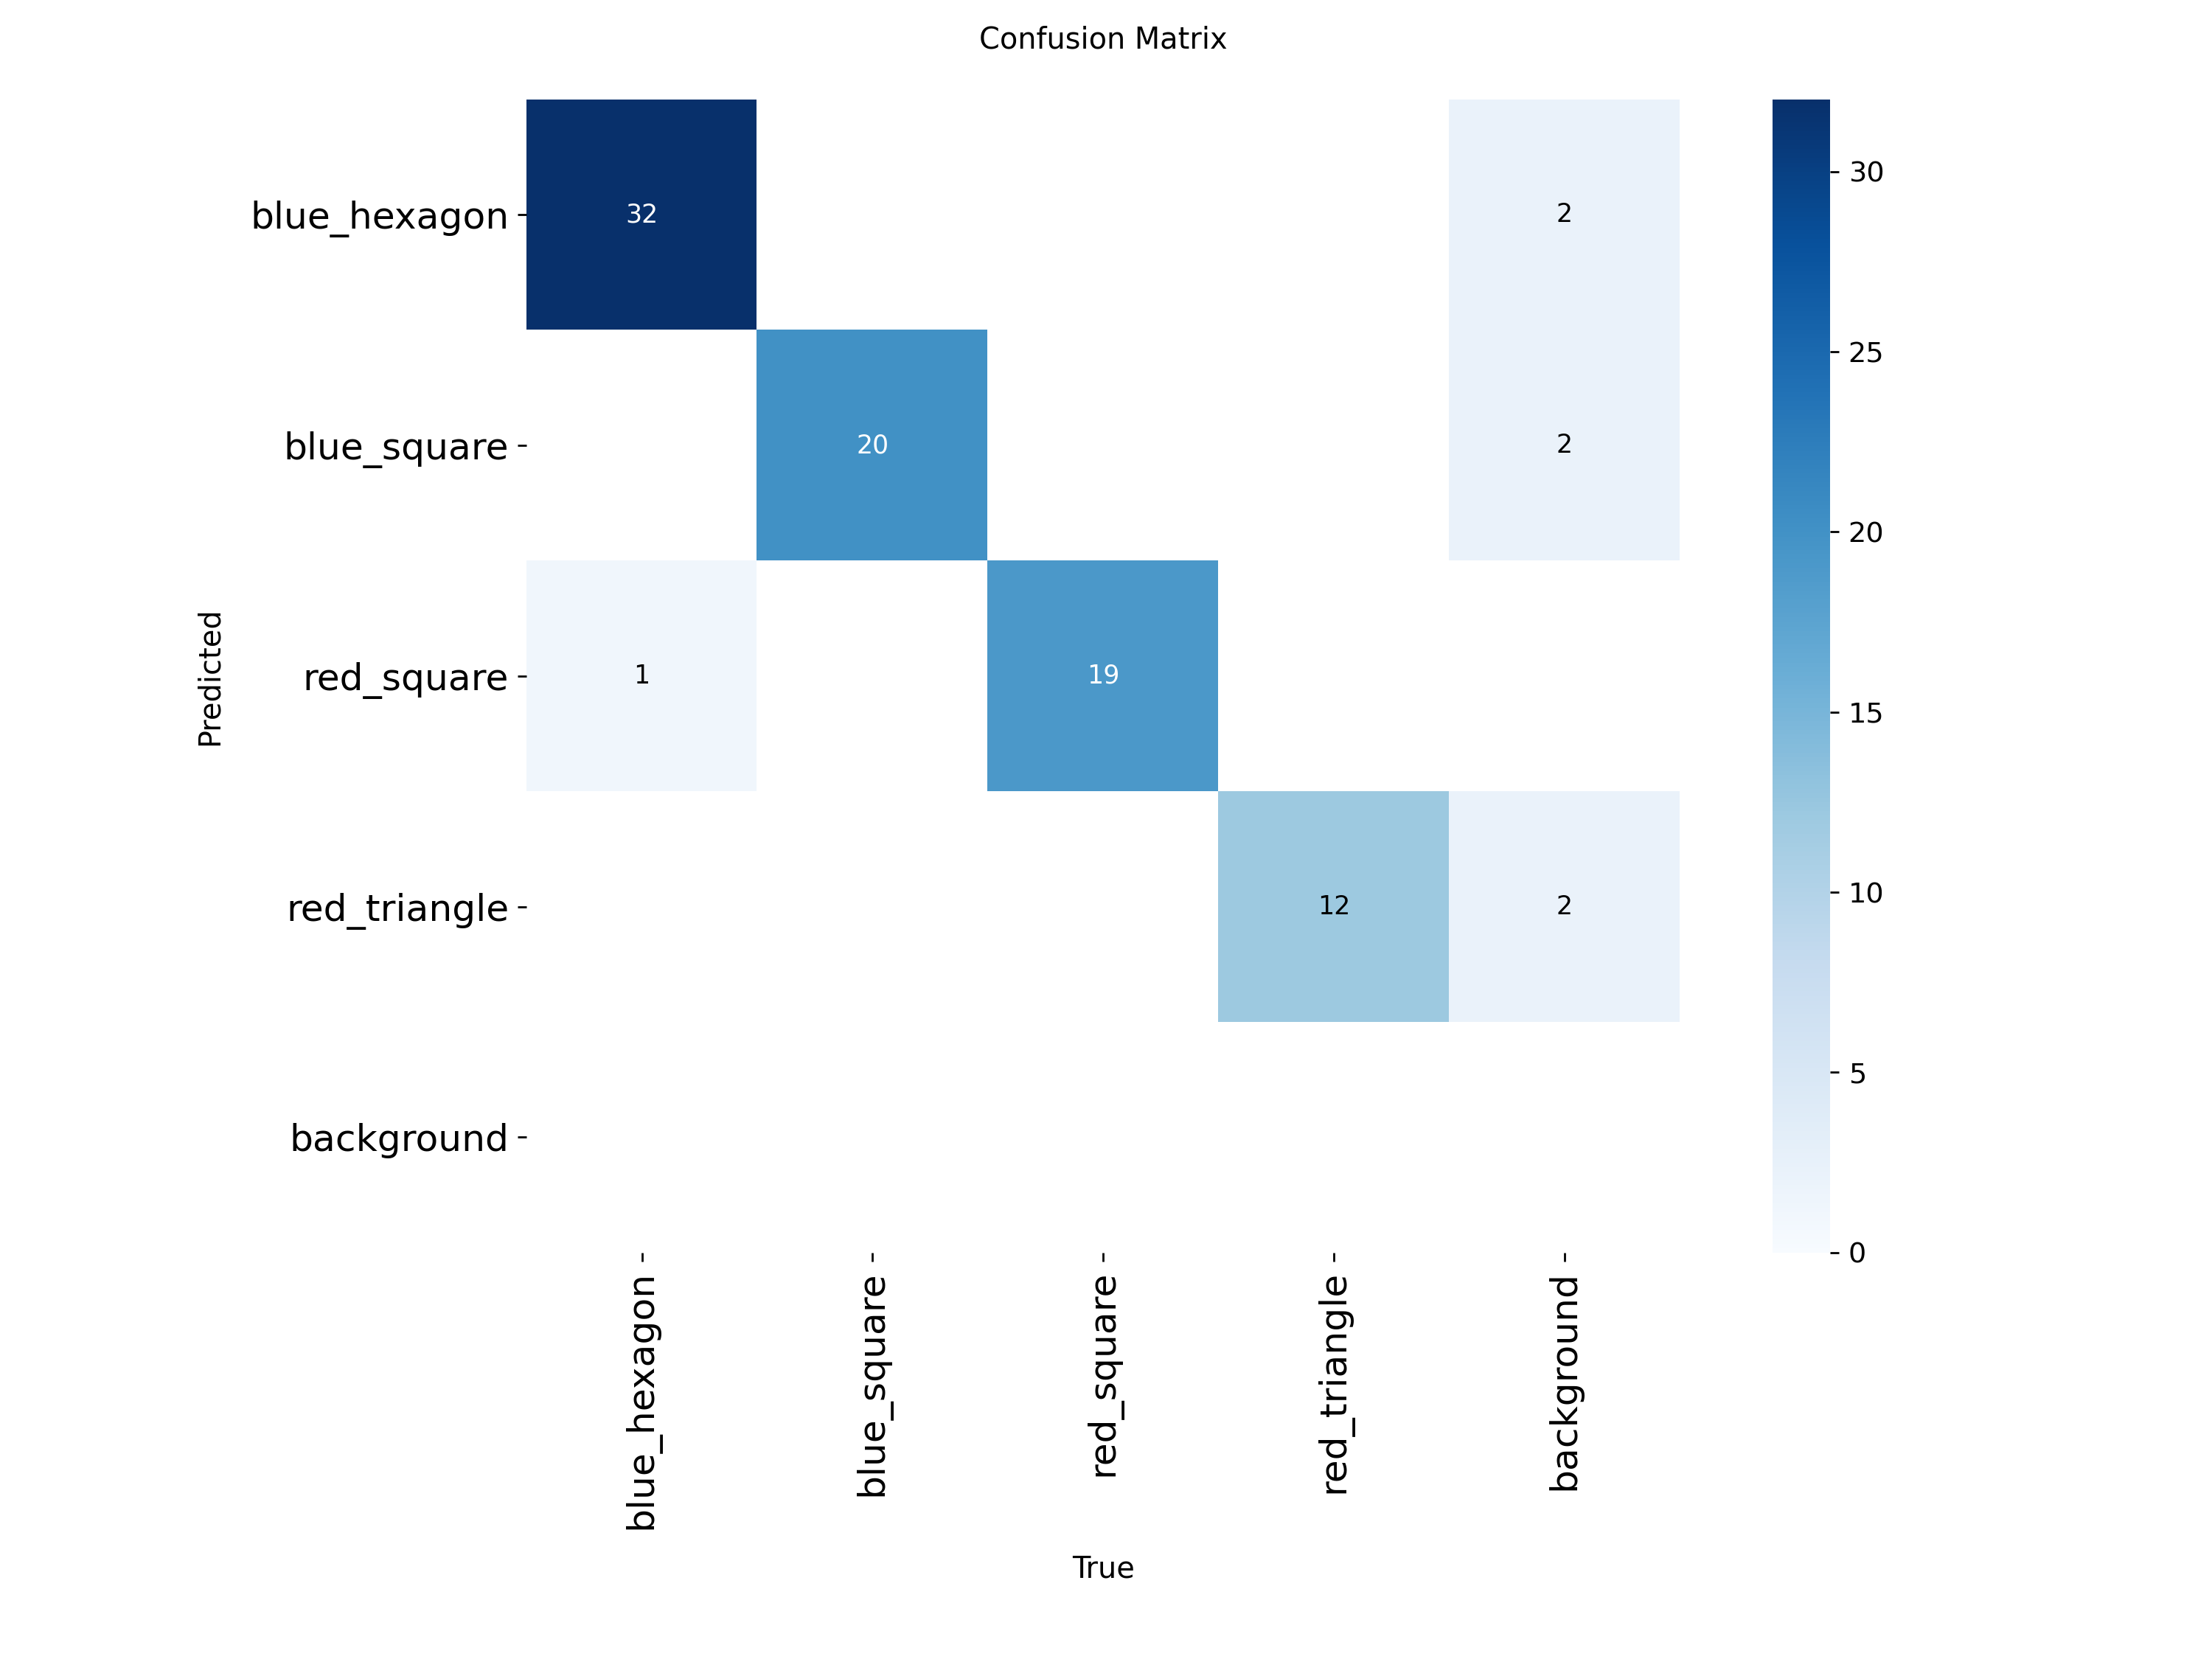

In [14]:
#test seti confusion matrixi
print("TEST Seti Confusion Matrix")
display(Image(filename="/content/runs/detect/val/confusion_matrix.png", width=600))

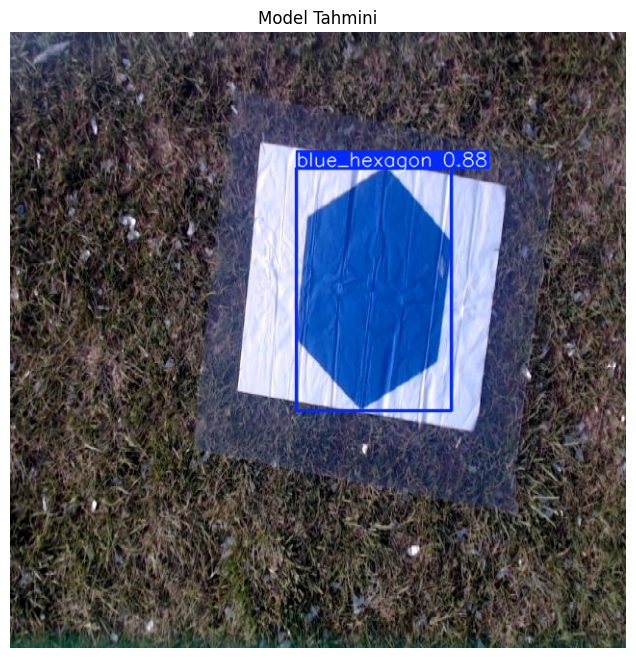

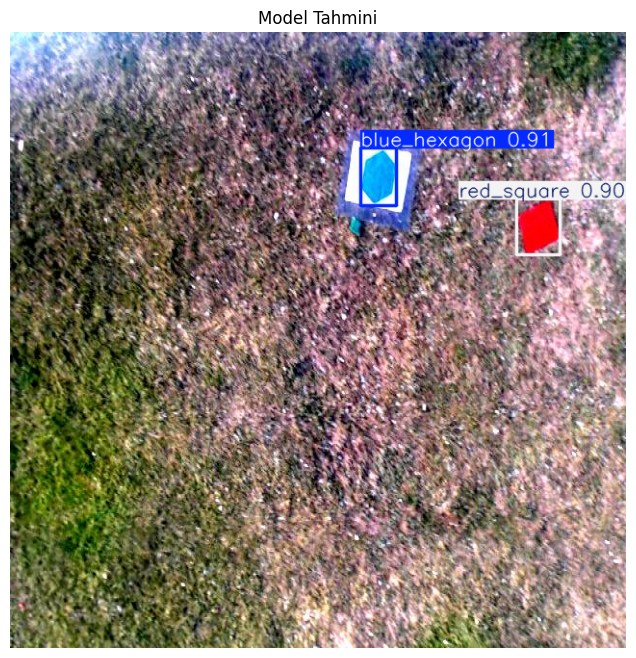

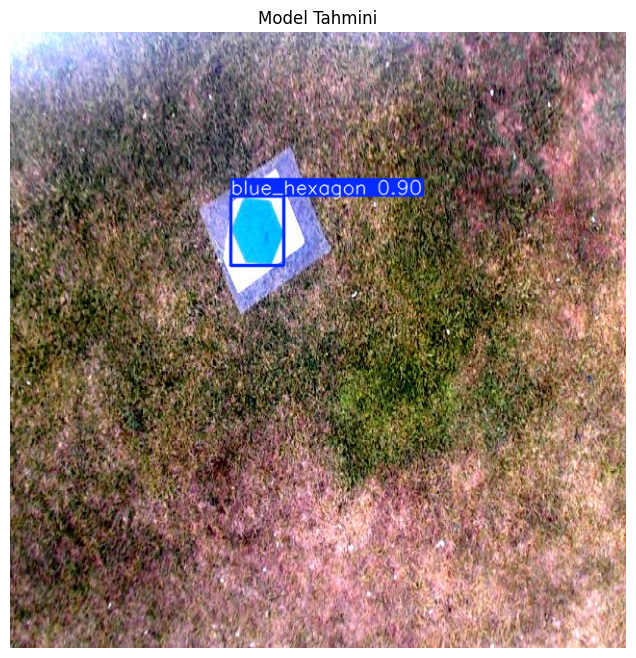

In [19]:
#Test setinden rastgele tahmin Örnekleri

import glob
import random

#test klasorundeki resimlerin listelenmesi
test_images = glob.glob("/content/my_dataset/test/images/*.jpg")

#random 3 resim secme ve tahmin
if test_images:
    selected_images = random.sample(test_images, 3)

    for img_path in selected_images:
        #prediction, conf=0.5: %50'nin altındaki ihtimalleri çizme
        results = best_model.predict(source=img_path, conf=0.5, verbose=False)

        #result
        for result in results:
            #bounding boxlar ile
            im_array = result.plot()
            plt.figure(figsize=(8, 8))
            plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title("Model Tahmini")
            plt.show()